In [2]:
from math import *
import numpy as np
import pandas as pd
from pathlib import Path
from IPython.display import display, HTML
import seaborn as sns
sns.set_style('white')

# colormap definitions
from matplotlib import cm 

%matplotlib inline
import matplotlib.pyplot as plt

import string
import openpyxl
import xlrd
import csv



In [3]:
path = Path("../downloads/a1-data-detailed.csv")
df = pd.read_csv(path, header=[1])
df.dropna(thresh=2, inplace=True)
df.drop(df.columns[[-1,-2]],axis=1, inplace=True)
df.drop(df.index[[i for i in range(7)]], inplace=True)
df.rename(columns={'Title': 'Date'}, inplace=True)
cols = df.columns.drop('Date')
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')
df['Date'] = pd.to_datetime(df['Date'])
df = df.reset_index(drop=True)
print(df.dtypes)
df.head(25)

Date                                     datetime64[ns]
Capital and Reserve Bank Reserve Fund             int64
Notes on issue                                    int64
Exchange settlement balances                      int64
RBA term deposits                               float64
Deposits of overseas institutions                 int64
Australian Government Deposits                    int64
State Governments Deposits                        int64
Other Deposits                                    int64
Other liabilities                                 int64
Total liabilities                                 int64
Gold and foreign exchange                         int64
Australian dollar investments                     int64
Loans and advances                                int64
Clearing items                                    int64
Other assets                                      int64
Total assets                                      int64
dtype: object


,Date,Capital and Reserve Bank Reserve Fund,Notes on issue,Exchange settlement balances,RBA term deposits,Deposits of overseas institutions,Australian Government Deposits,State Governments Deposits,Other Deposits,Other liabilities,Total liabilities,Gold and foreign exchange,Australian dollar investments,Loans and advances,Clearing items,Other assets,Total assets
0,1994-06-01,633,17231,3241,NaN,459,2059,50,37,9755,33465,19179,13680,102,0,504,33465
1,1994-06-08,633,17301,3238,NaN,463,2291,24,30,9208,33188,19183,13055,98,354,498,33188
2,1994-06-15,633,17477,3275,NaN,462,1815,84,61,9493,33300,19477,13086,98,159,480,33300
3,1994-06-22,633,17402,3355,NaN,458,2099,28,34,9542,33551,19545,12802,99,610,495,33551
4,1994-06-29,633,17450,3275,NaN,468,1674,32,29,10842,34403,20227,13563,98,14,501,34403
5,1994-07-06,633,17495,3764,NaN,465,1561,31,62,9524,33535,20083,12179,93,671,509,33535
6,1994-07-13,633,17515,3763,NaN,445,3167,46,46,9391,35006,19966,14325,92,114,509,35006
7,1994-07-20,633,17533,3807,NaN,439,565,69,49,9904,32999,19843,12563,92,1,500,32999
8,1994-07-27,633,17562,3805,NaN,435,1791,30,32,9729,34017,19788,13638,92,1,498,34017
9,1994-08-03,633,17587,3306,NaN,476,3417,33,62,9673,35187,19804,14801,93,0,489,35187


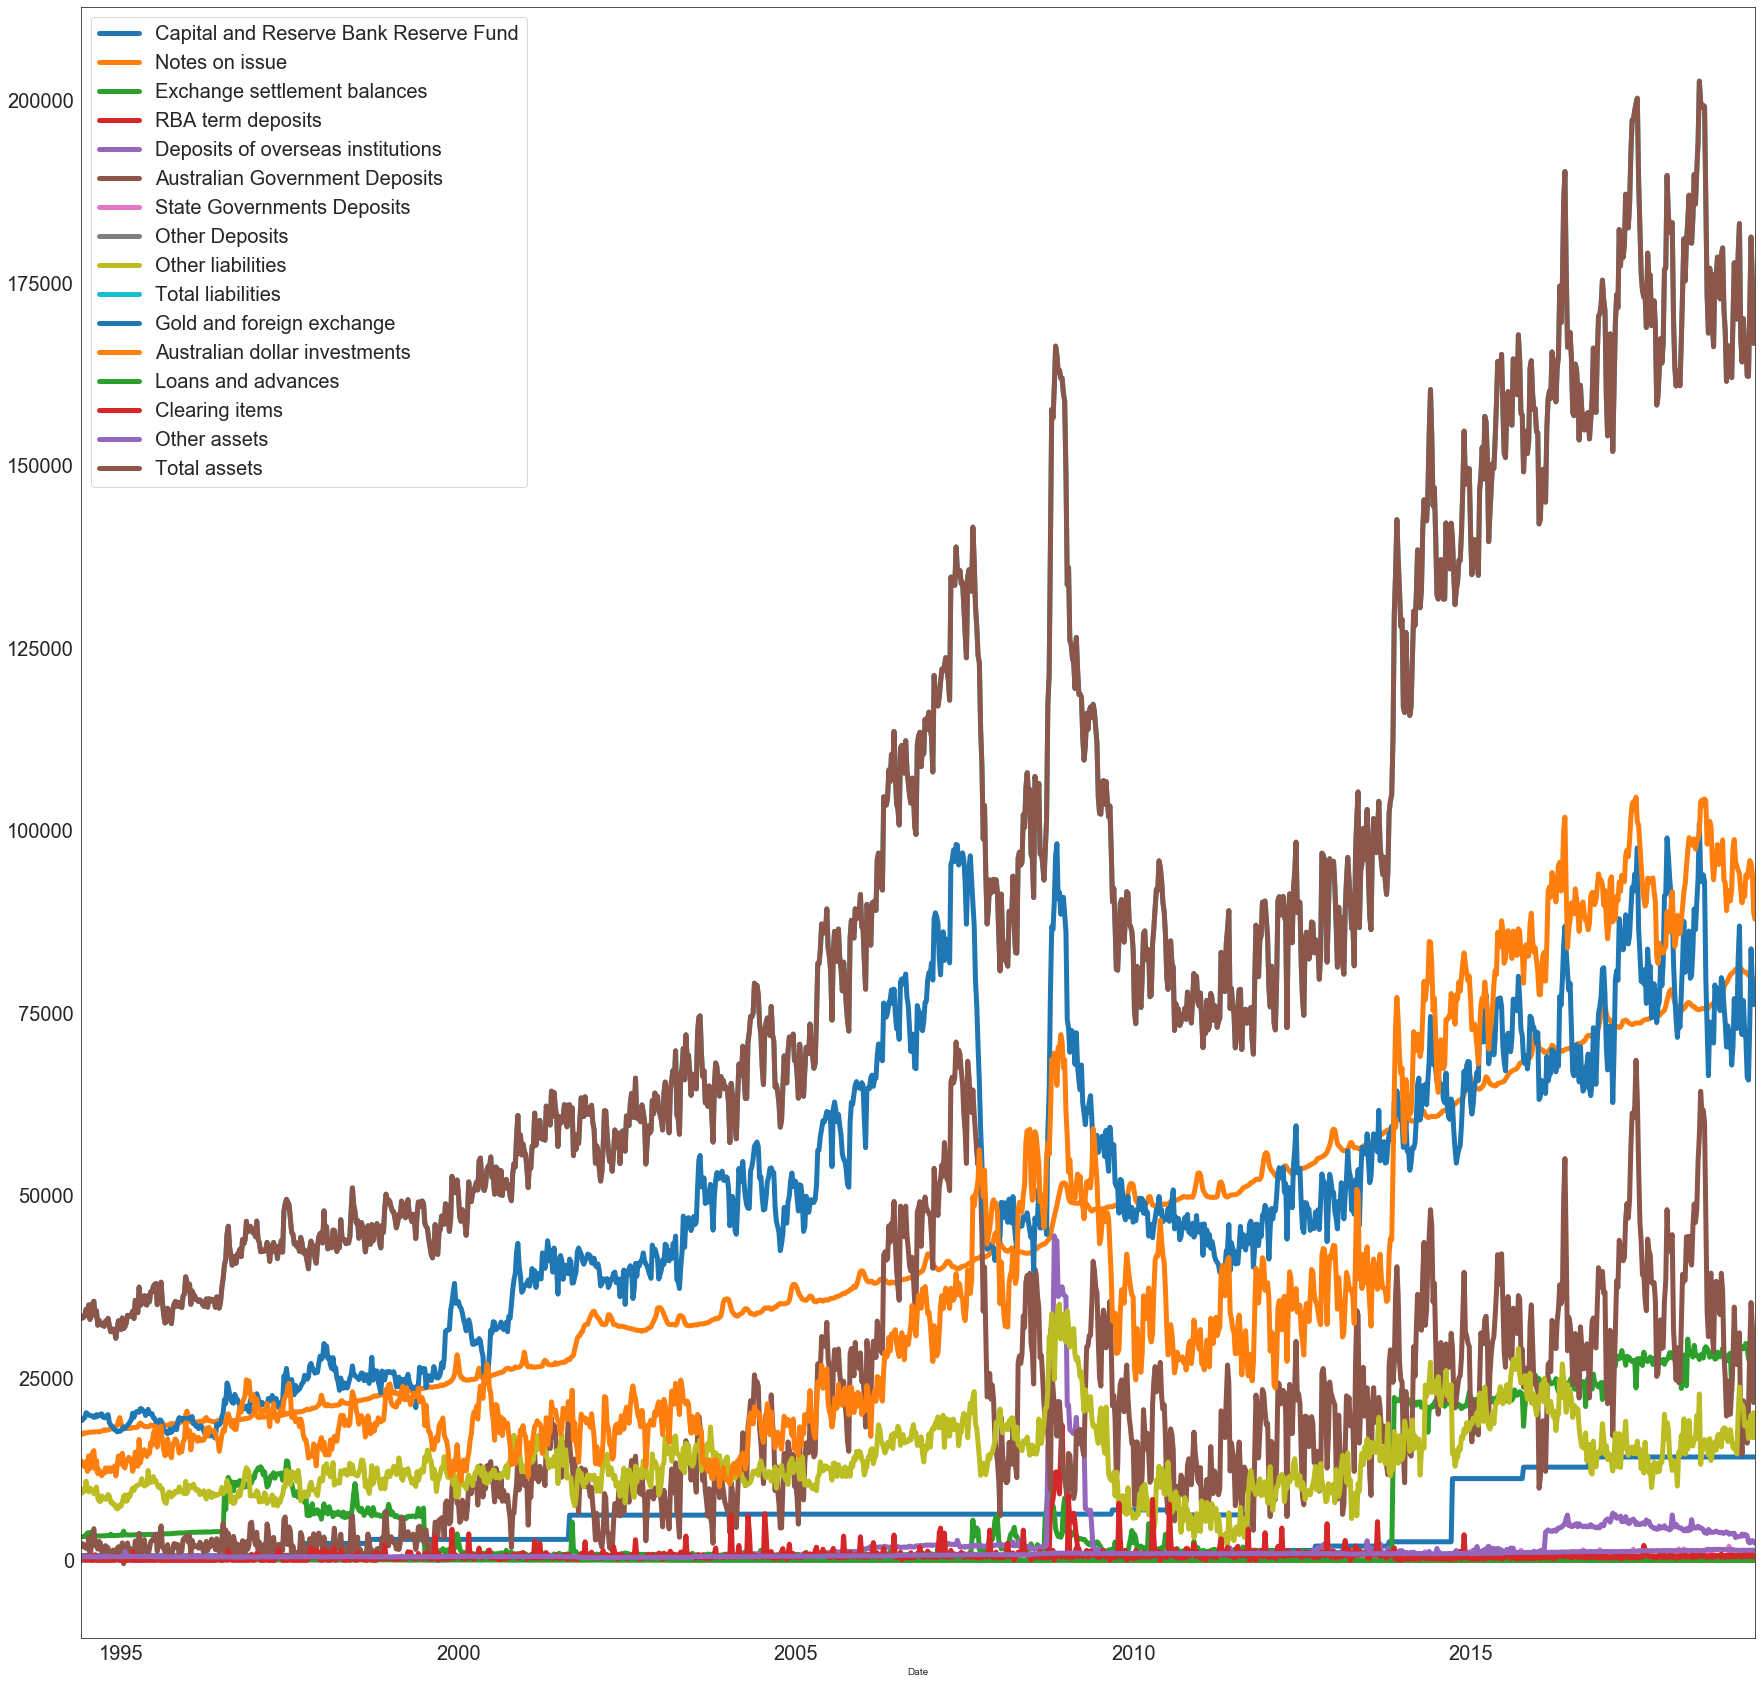

In [4]:
ax= df.set_index('Date', inplace=False).plot(linewidth=5,figsize=(30,30))
ax.legend( prop={'size': 20})
ax.tick_params(axis='both', which='major', labelsize=20)
ax.tick_params(axis='both', which='minor', labelsize=20)
plt.show()

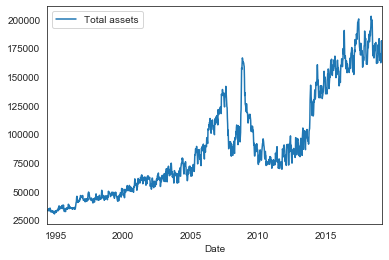

In [5]:
df.plot(x='Date', y='Total assets')

## Visualisation of the Global Financial Crisis (GFC)

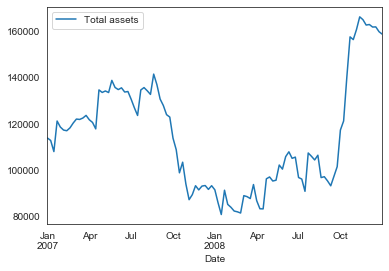

In [6]:
df[(df['Date'] > '2007-01-01') & (df['Date'] < '2009-01-01')].plot(x='Date', y='Total assets')
plt.show()

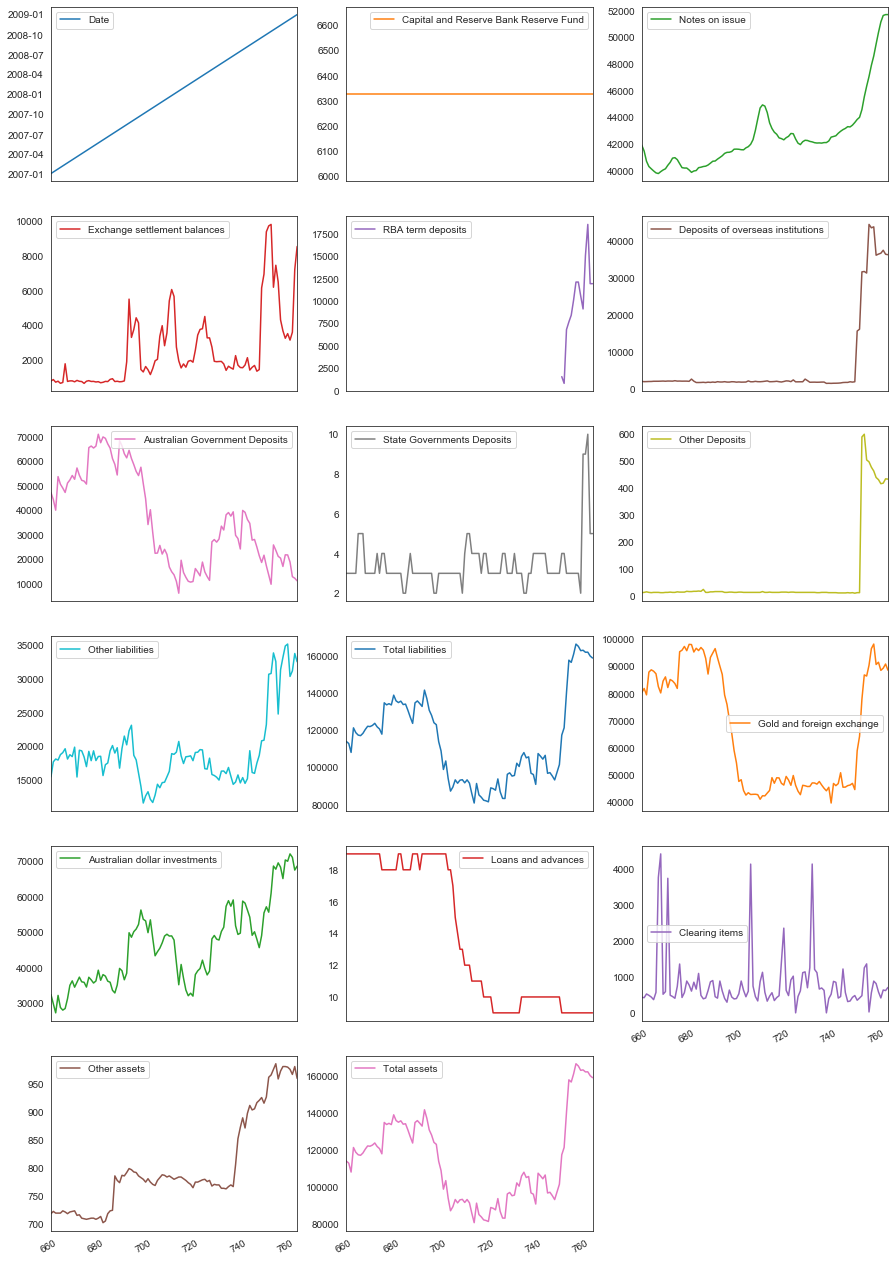

In [7]:
df[(df['Date'] > '2007-01-01') & (df['Date'] < '2009-01-01')].plot(subplots=True, layout=(6,3), figsize=(15,25))
plt.show()

## Visualisation of the Asian Financial Crisis

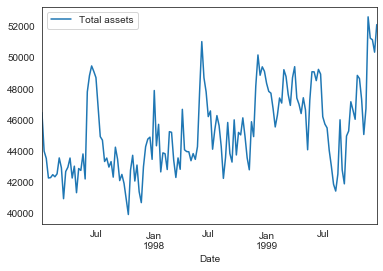

In [8]:
df[(df['Date'] > '1997-01-01') & (df['Date'] < '2000-01-01')].plot(x='Date', y='Total assets')
plt.show()

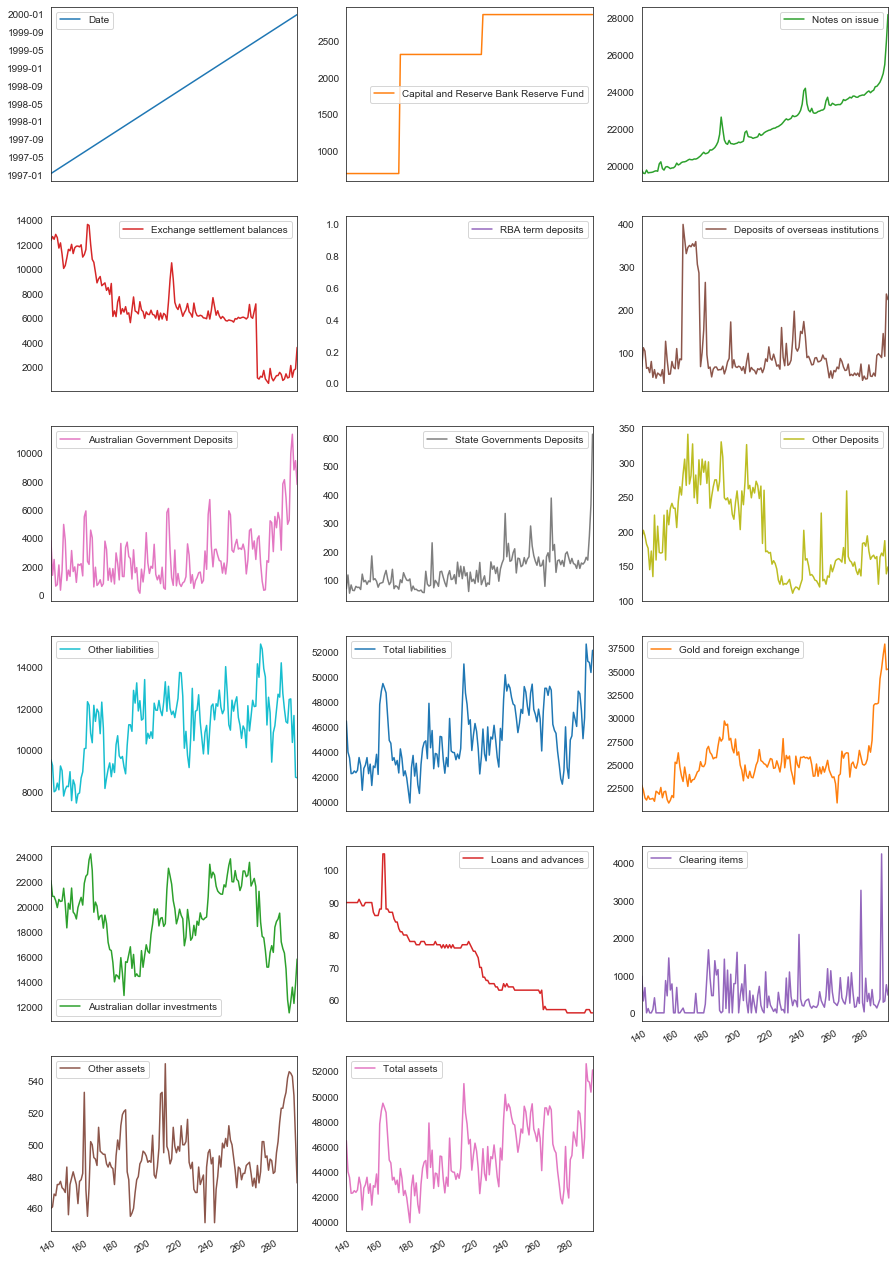

In [9]:
df[(df['Date'] > '1997-01-01') & (df['Date'] < '2000-01-01')].plot(subplots=True, layout=(6,3), figsize=(15,25))
plt.show()

In [10]:
df['% Total Assets change']= df['Total assets'].pct_change()*100 

Date
1994    -3.307102
1995    20.989374
1996    19.363270
1997    -0.817087
1998    16.703114
1999     9.391469
2000    11.636473
2001    15.324064
2002     4.206282
2003    11.704073
2004    12.526468
2005    30.329090
2006    34.408479
2007   -17.253328
2008    63.153836
2009   -57.386742
2010    -7.703621
2011    21.861278
2012    20.219238
2013    39.946187
2014    19.598489
2015     6.095303
2016    13.867434
2017     8.757958
2018     0.713192
2019    -4.586537
Name: % Total Assets change, dtype: float64 

 Date
1994   -0.110237
1995    0.403642
1996    0.372371
1997   -0.015417
1998    0.321214
1999    0.180605
2000    0.223778
2001    0.294694
2002    0.080890
2003    0.220832
2004    0.240894
2005    0.583252
2006    0.661702
2007   -0.331795
2008    1.191582
2009   -1.103591
2010   -0.148147
2011    0.420409
2012    0.388832
2013    0.768196
2014    0.369783
2015    0.117217
2016    0.266681
2017    0.168422
2018    0.013715
2019   -0.352811
Name: % Total Assets change, dtyp

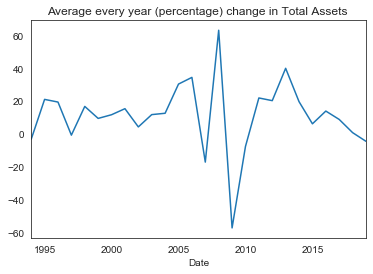

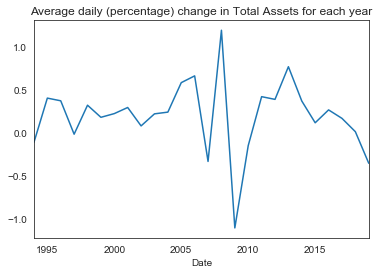

In [11]:
a=df.groupby(df.Date.dt.year)['% Total Assets change']
print(a.sum(),'\n\n',a.mean())
a.sum().plot(title="Average every year (percentage) change in Total Assets ")
plt.show()

a.mean().plot(title="Average daily (percentage) change in Total Assets for each year")
plt.show()